In [7]:
#python

In [1]:
import sympy as sym
from sympy.plotting import plot

In [2]:
x,a,b = sym.symbols("x,a,b")

In [3]:
pa = ((x-b)/(a-b)).subs(a,-1).subs(b,1)
pb = ((x-a)/(b-a)).subs(a,-1).subs(b,1)

dpa = sym.diff(pa)
dpb = sym.diff(pb)

In [5]:
pb

x/2 + 1/2

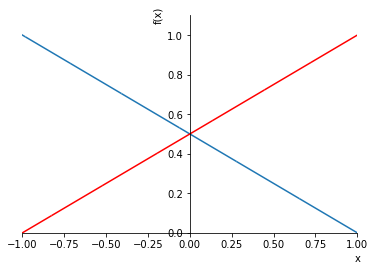

In [11]:
p1 = plot(pa,xlim=(-1,1),ylim=(0,1.1),show=False)
p1.append(plot(pb,line_color ='red',show=False)[0])
p1.show()

$$A^e_{AB} = \int \phi_A' \phi_B'\,dx$$

In [12]:
a1 = sym.integrate(dpa*dpa,(x,-1,1))
a2 = sym.integrate(dpa*dpb,(x,-1,1))
a3 = sym.integrate(dpb*dpa,(x,-1,1))
a4 = sym.integrate(dpb*dpb,(x,-1,1))
Ae = sym.Matrix([[a1,a2],[a3,a4]])
Ae

Matrix([
[ 1/2, -1/2],
[-1/2,  1/2]])

$$C^e_{AB} = \int \phi_A \phi_B\,dx$$

In [13]:
c1 = sym.integrate(pa*pa,(x,-1,1))
c2 = sym.integrate(pa*pb,(x,-1,1))
c3 = sym.integrate(pb*pa,(x,-1,1))
c4 = sym.integrate(pb*pb,(x,-1,1))
Ce = sym.Matrix([[c1,c2],[c3,c4]])
Ce

Matrix([
[2/3, 1/3],
[1/3, 2/3]])

$$K^e = \alpha A^e + \gamma C^e$$

In [14]:
import numpy as np

In [16]:
N = 7
X = np.linspace(0,1,N)

E = np.arange(N)

LM = np.array([],dtype=int)
for e in E:
    LM = np.append(LM,[e,e+1])

LM = LM.reshape(N,2)[:-1]

In [17]:
LM

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

In [18]:
alfa = 1
gamma = 0

Ae = np.array([[1,-1],[-1,1]])/2
Ce = np.array([[2,1],[1,2]])/3

he = X[1]-X[0]

K = np.zeros((N,N))
for e,globalP in enumerate(LM):
    localP = globalP-e

    g_i = globalP[0]
    g_j = globalP[1]

    l_i = localP[0]
    l_j = localP[1]

    K[g_i,g_i] += 2*alfa*Ae[l_i,l_i]/he + he*gamma*Ce[l_i,l_i]/2
    K[g_i,g_j] += 2*alfa*Ae[l_i,l_j]/he + he*gamma*Ce[l_i,l_j]/2
    K[g_j,g_i] += 2*alfa*Ae[l_j,l_i]/he + he*gamma*Ce[l_j,l_i]/2
    K[g_j,g_j] += 2*alfa*Ae[l_j,l_j]/he + he*gamma*Ce[l_j,l_j]/2

K[0,0] += 2*alfa*Ae[1,1]/he + he*gamma*Ce[1,1]/2
K[-1,-1] += 2*alfa*Ae[0,0]/he + he*gamma*Ce[0,0]/2


In [19]:
np.round(K)

array([[12., -6.,  0.,  0.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.,  0.,  0.],
       [ 0.,  0., -6., 12., -6.,  0.,  0.],
       [ 0.,  0.,  0., -6., 12., -6.,  0.],
       [ 0.,  0.,  0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0.,  0.,  0., -6., 12.]])

$$F^e_A = \int \phi_a f\, dx$$
$$F^e_B = \int \phi_b f\, dx$$

In [20]:
f1 = sym.integrate(pa*1,(x,-1,1))
f2 = sym.integrate(pb*1,(x,-1,1))
fe = np.array([f1,f2]);fe

array([1, 1], dtype=object)

In [21]:
Fe = np.array([1,1])

he = X[1]-X[0]

F = np.zeros(N)
for e,globalP in enumerate(LM):
    localP = globalP-e

    g_i = globalP[0]
    g_j = globalP[1]

    l_i = localP[0]
    l_j = localP[1]

    F[g_i] += he*Fe[l_i]/2
    F[g_j] += he*Fe[l_j]/2

F[0] += he*Fe[1]/2
F[-1] += he*Fe[0]/2


In [22]:
F

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.16666667])

In [179]:
# Boundary Conditions

F[0] = 0
F[-1] = 0

K[0,0] = 1
K[-1,-1] = 1


K[0,1] = K[1,0] = 0
K[-2,-1] = K[-1,-2] = 0

In [180]:
np.round(K)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 12., -6.,  0.,  0.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.,  0.,  0.],
       [ 0.,  0., -6., 12., -6.,  0.,  0.],
       [ 0.,  0.,  0., -6., 12., -6.,  0.],
       [ 0.,  0.,  0.,  0., -6., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [181]:
F

array([0.        , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667, 0.        ])

In [182]:
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [183]:
uh = solve(K,F)
Y = np.linspace(0,1,100)
u = -Y*(Y-1)/2

In [184]:
uh

array([ 0.        ,  0.06944444,  0.11111111,  0.125     ,  0.11111111,
        0.06944444, -0.        ])

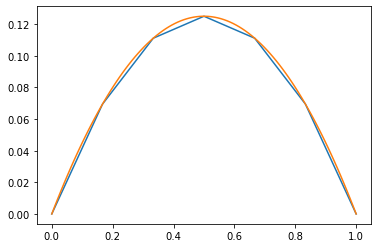

In [185]:
plt.plot(X,uh)
plt.plot(Y,u)